<a href="https://colab.research.google.com/github/Esperance98/Thesis-Code/blob/main/NUMERICAL_APPROACH_OF_ODEs(pc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

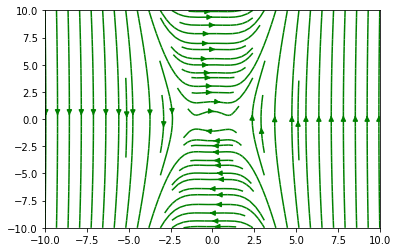

In [ ]:
def F(Y, t):
    y1, y2 = Y
    return y2 , y1**3 - y1
#     return 3*y1+2*y2, -(1/3)*y1 - 2*y2


# y1 = np.linspace(-10.0, 10.0, 50)
# y2 = np.linspace(-10.0, 10.0, 50)

# Y = np.meshgrid(y1, y2)
# Y1, Y2 = Y
# t=0
# u,v = F(Y, t)

# streamplot(Y1, Y2, u, v, color='g')

### Explicit Euler Method

In [ ]:
def f(z,t):
    z1,z2,z3 = z
    z1 = z[0]
    z2 = z[1]
    z3 = z[2]
    f = np.array([(-1/2)*z[0],(1/2)*z[0]-(1/4)*z[1],(1/4)*z[1]-(1/6)*z[2]])
    return f



def ExplEuler(t,f,h,z0):
    X = np.zeros((len(t),len(z0)))
    X[0] = z0
    for n in range(len(t)-1):
        X[n+1]= X[n] + h*f(X[n],t[n])
    return X

# initial condition 
z0 = np.array([1,1,1])
t = np.linspace(0,1,100)
h = 0.01
Z = ExplEuler(t,f,h,z0)


# plt.subplot(1,1,1)
# plt.plot(t,x1)
# plt.xlabel('time')
# plt.ylabel('x1(t)')
# plt.show()


In [ ]:
# Aproximate

z1 = Z[:,0]
z2 = Z[:,1]
z3 = Z[:,2]
# exact solution

ez1=np.exp(-t/2)
ez2=-2*np.exp(-t/2)+3*np.exp(-t/4)
ez3=(3/2)*np.exp(-t/2)-9*np.exp(-t/4) + (17/2)*np.exp(-t/6)


# errors

err1 = abs(z1-ez1)
err2 = abs(z2-ez2)
err3 = abs(z3-ez3)

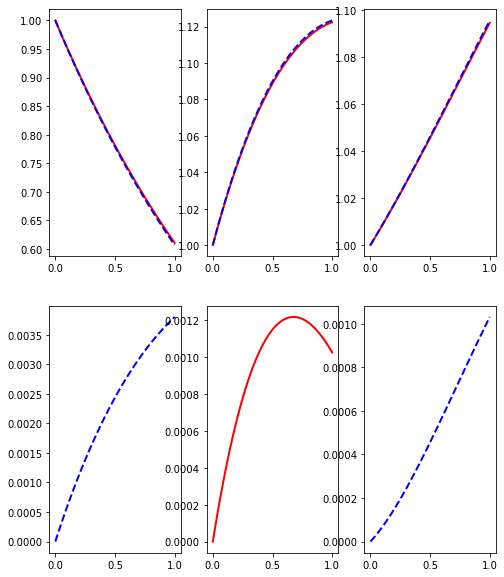

In [ ]:
# plots of exact solution and approximate solution with their error
fig = plt.figure(figsize=(8, 10))

plt.subplot(2,3,1)
plt.plot(t,z1,'r',linewidth = 2, label= 'approximate solution')
plt.plot(t,ez1,'b--',linewidth = 2, label= 'exact solution')


plt.subplot(2,3,2)
plt.plot(t,z2,'r',linewidth = 2, label= 'approximate solution')
plt.plot(t,ez2,'b--',linewidth = 2, label= 'exact solution')


plt.subplot(2,3,3)
plt.plot(t,z3,'r',linewidth = 2, label= 'approximate solution')
plt.plot(t,ez3,'b--',linewidth = 2, label= 'exact solution')


plt.subplot(2,3,4)
plt.plot(t,err1,'b--',linewidth = 2, label= 'error 2')

plt.subplot(2,3,5)
plt.plot(t,err2,'r',linewidth = 2, label= 'error 2')
plt.subplot(2,3,6)
plt.plot(t,err3,'b--',linewidth = 2, label= 'error 3')

plt.show()


### implicit Euler Method

In [ ]:
def f(x,t):
    x1,x2,x3 = x
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    f = np.array([(-1/2)*x[0],(1/2)*x[0]-(1/4)*x[1],(1/4)*x[1]-(1/6)*x[2]])
    return f


def implicitEuler(f,x0,t,h):
    X = np.zeros((len(t),len(x0)))
    X[0] = x0
    for n in range (len(t)-1):
        def Xp(xp):
            return xp-X[n]-h*np.array(f(xp,t[n+1]))
        xp = fsolve(Xp,x0)
        X[n+1]= xp
    return X
# initial condition
x0 = np.array([1,1,1])
t = np.linspace(0,1,100)
h = 0.01
X = implicitEuler(f,x0,t,h)

# Aproximate

x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
# exact solution

ex1=np.exp(-t/2)
ex2=-2*np.exp(-t/2)+3*np.exp(-t/4)
ex3=(3/2)*np.exp(-t/2)-9*np.exp(-t/4) + (17/2)*np.exp(-t/6)


# errors

er1 = abs(x1-ex1)
er2 = abs(x2-ex2)
er3 = abs(x3-ex3)

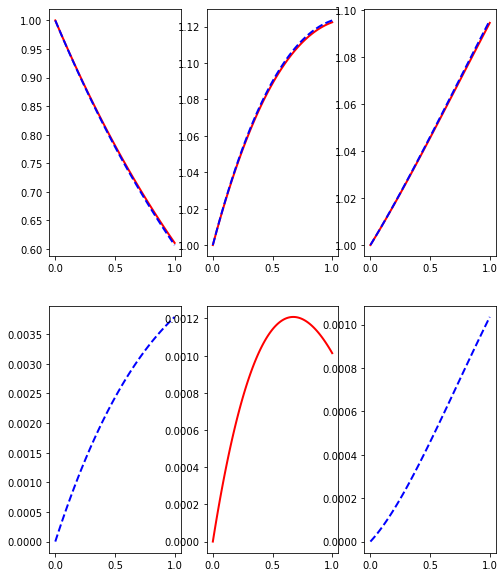

In [ ]:
# plots of exact solution and approximate solution with their error
fig = plt.figure(figsize=(8, 10))



plt.subplot(2,3,1)
plt.plot(t,x1,'r',linewidth = 2, label= 'approximate solution of x1')
plt.plot(t,ex1,'b--',linewidth = 2, label= 'exact solution of x1')


plt.subplot(2,3,2)
plt.plot(t,x2,'r',linewidth = 2, label= 'approximate solution of x2')
plt.plot(t,ex2,'b--',linewidth = 2, label= 'exact solution of x2')


plt.subplot(2,3,3)
plt.plot(t,x3,'r',linewidth = 2, label= 'approximate solution of x3')
plt.plot(t,ex3,'b--',linewidth = 2, label= 'exact solution of x3')


plt.subplot(2,3,4)
plt.plot(t,er1,'b--',linewidth = 2, label= 'error 2')

plt.subplot(2,3,5)
plt.plot(t,er2,'r',linewidth = 2, label= 'error 2')
plt.subplot(2,3,6)
plt.plot(t,er3,'b--',linewidth = 2, label= 'error 3')


plt.show()


### Modified Implicit Euler Method

In [ ]:
def f(x,t):
    x1,x2,x3 = x
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    f = np.array([(-1/2)*x[0],(1/2)*x[0]-(1/4)*x[1],(1/4)*x[1]-(1/6)*x[2]])
    return f

def ModifiedEuler(f,x0,h,t):
#     Xp = np.zeros((len(t),len(x0)))
    X = np.zeros((len(t),len(x0)))
    X[0] = x0
    for n in range(len(t)-1):
        Xp = X[n] +h*f(X[n],t[n])
        X[n+1]= X[n] + h*f(Xp,t[n+1])
    return X

# initial condition

x0 = np.array([1,1,1])
t = np.linspace(0,1,100)
h = 0.01
Z = ModifiedEuler(f,x0,h,t)

# Aproximate

x1 = Z[:,0]
x2 = Z[:,1]
x3 = Z[:,2]
# exact solution

ex1=np.exp(-t/2)
ex2=-2*np.exp(-t/2)+3*np.exp(-t/4)
ex3=(3/2)*np.exp(-t/2)-9*np.exp(-t/4) + (17/2)*np.exp(-t/6)


# errors

erx1 = abs(x1-ex1)
erx2 = abs(x2-ex2)
erx3 = abs(x3-ex3)

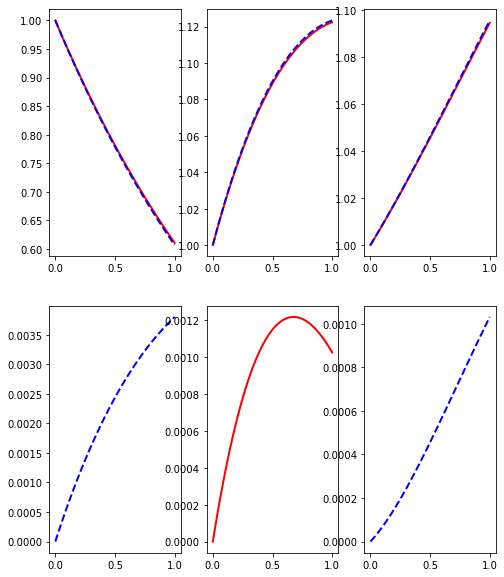

In [ ]:
fig = plt.figure(figsize=(8, 10))



plt.subplot(2,3,1)
plt.plot(t,x1,'r',linewidth = 2, label= 'approximate solution of x1')
plt.plot(t,ex1,'b--',linewidth = 2, label= 'exact solution of x1')


plt.subplot(2,3,2)
plt.plot(t,x2,'r',linewidth = 2, label= 'approximate solution of x2')
plt.plot(t,ex2,'b--',linewidth = 2, label= 'exact solution of x2')


plt.subplot(2,3,3)
plt.plot(t,x3,'r',linewidth = 2, label= 'approximate solution of x3')
plt.plot(t,ex3,'b--',linewidth = 2, label= 'exact solution of x3')


plt.subplot(2,3,4)
plt.plot(t,erx1,'b--',linewidth = 2, label= 'error 2')

plt.subplot(2,3,5)
plt.plot(t,erx2,'r',linewidth = 2, label= 'error 2')
plt.subplot(2,3,6)
plt.plot(t,erx3,'b--',linewidth = 2, label= 'error 3')


plt.show()
